In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Eclesiastes_1 = "The words of the Preacher, the son of David, king in Jerusalem.Vanity of vanities, said the Preacher, vanity of vanities; all is vanity.What profit has a man of all his labor which he takes under the sun?One generation passes away, and another generation comes: but the earth stays for ever.The sun also rises, and the sun goes down, and hastens to his place where he arose.The wind goes toward the south, and turns about to the north; it whirls about continually, and the wind returns again according to his circuits.All the rivers run into the sea; yet the sea is not full; to the place from where the rivers come, thither they return again.All things are full of labor; man cannot utter it: the eye is not satisfied with seeing, nor the ear filled with hearing.The thing that has been, it is that which shall be; and that which is done is that which shall be done: and there is no new thing under the sun.Is there any thing whereof it may be said, See, this is new? it has been already of old time, which was before us.There is no remembrance of former things; neither shall there be any remembrance of things that are to come with those that shall come after.I the Preacher was king over Israel in Jerusalem.And I gave my heart to seek and search out by wisdom concerning all things that are done under heaven: this sore travail has God given to the sons of man to be exercised therewith.I have seen all the works that are done under the sun; and, behold, all is vanity and vexation of spirit.That which is crooked cannot be made straight: and that which is wanting cannot be numbered.I communed with my own heart, saying, See, I am come to great estate, and have gotten more wisdom than all they that have been before me in Jerusalem: yes, my heart had great experience of wisdom and knowledge.And I gave my heart to know wisdom, and to know madness and folly: I perceived that this also is vexation of spirit.For in much wisdom is much grief: and he that increases knowledge increases sorrow.".lower()

In [6]:
Eclesiastes_2 = "I said in my heart, Go to now, I will prove you with mirth, therefore enjoy pleasure: and, behold, this also is vanity.I said of laughter, It is mad: and of mirth, What does it?I sought in my heart to give myself to wine, yet acquainting my heart with wisdom; and to lay hold on folly, till I might see what was that good for the sons of men, which they should do under the heaven all the days of their life.I made me great works; I built me houses; I planted me vineyards:I made me gardens and orchards, and I planted trees in them of all kind of fruits:I made me pools of water, to water therewith the wood that brings forth trees:I got me servants and maidens, and had servants born in my house; also I had great possessions of great and small cattle above all that were in Jerusalem before me:I gathered me also silver and gold, and the peculiar treasure of kings and of the provinces: I got me men singers and women singers, and the delights of the sons of men, as musical instruments, and that of all sorts.So I was great, and increased more than all that were before me in Jerusalem: also my wisdom remained with me.And whatever my eyes desired I kept not from them, I withheld not my heart from any joy; for my heart rejoiced in all my labor: and this was my portion of all my labor.Then I looked on all the works that my hands had worked, and on the labor that I had labored to do: and, behold, all was vanity and vexation of spirit, and there was no profit under the sun.And I turned myself to behold wisdom, and madness, and folly: for what can the man do that comes after the king? even that which has been already done.Then I saw that wisdom excels folly, as far as light excels darkness.The wise man' eyes are in his head; but the fool walks in darkness: and I myself perceived also that one event happens to them all.Then said I in my heart, As it happens to the fool, so it happens even to me; and why was I then more wise? Then I said in my heart, that this also is vanity.For there is no remembrance of the wise more than of the fool for ever; seeing that which now is in the days to come shall all be forgotten. And how dies the wise man? as the fool.Therefore I hated life; because the work that is worked under the sun is grievous to me: for all is vanity and vexation of spirit.Yes, I hated all my labor which I had taken under the sun: because I should leave it to the man that shall be after me.And who knows whether he shall be a wise man or a fool? yet shall he have rule over all my labor wherein I have labored, and wherein I have showed myself wise under the sun. This is also vanity.Therefore I went about to cause my heart to despair of all the labor which I took under the sun.For there is a man whose labor is in wisdom, and in knowledge, and in equity; yet to a man that has not labored therein shall he leave it for his portion. This also is vanity and a great evil.For what has man of all his labor, and of the vexation of his heart, wherein he has labored under the sun?For all his days are sorrows, and his travail grief; yes, his heart takes not rest in the night. This is also vanity.There is nothing better for a man, than that he should eat and drink, and that he should make his soul enjoy good in his labor. This also I saw, that it was from the hand of God.For who can eat, or who else can hasten hereunto, more than I?For God gives to a man that is good in his sight wisdom, and knowledge, and joy: but to the sinner he gives travail, to gather and to heap up, that he may give to him that is good before God. This also is vanity and vexation of spirit.".lower()

In [7]:
Eclesiastes_3 = "To every thing there is a season, and a time to every purpose under the heaven:A time to be born, and a time to die; a time to plant, and a time to pluck up that which is planted;A time to kill, and a time to heal; a time to break down, and a time to build up;A time to weep, and a time to laugh; a time to mourn, and a time to dance;A time to cast away stones, and a time to gather stones together; a time to embrace, and a time to refrain from embracing;A time to get, and a time to lose; a time to keep, and a time to cast away;A time to rend, and a time to sew; a time to keep silence, and a time to speak;A time to love, and a time to hate; a time of war, and a time of peace.What profit has he that works in that wherein he labors?I have seen the travail, which God has given to the sons of men to be exercised in it.He has made every thing beautiful in his time: also he has set the world in their heart, so that no man can find out the work that God makes from the beginning to the end.I know that there is no good in them, but for a man to rejoice, and to do good in his life.And also that every man should eat and drink, and enjoy the good of all his labor, it is the gift of God.I know that, whatever God does, it shall be for ever: nothing can be put to it, nor any thing taken from it: and God does it, that men should fear before him.That which has been is now; and that which is to be has already been; and God requires that which is past.And moreover I saw under the sun the place of judgment, that wickedness was there; and the place of righteousness, that iniquity was there.I said in my heart, God shall judge the righteous and the wicked: for there is a time there for every purpose and for every work.I said in my heart concerning the estate of the sons of men, that God might manifest them, and that they might see that they themselves are beasts.For that which befalls the sons of men befalls beasts; even one thing befalls them: as the one dies, so dies the other; yes, they have all one breath; so that a man has no preeminence above a beast: for all is vanity.All go to one place; all are of the dust, and all turn to dust again.Who knows the spirit of man that goes upward, and the spirit of the beast that goes downward to the earth?Why I perceive that there is nothing better, than that a man should rejoice in his own works; for that is his portion: for who shall bring him to see what shall be after him?".lower()

In [8]:
Eclesiastes_4 = "So I returned, and considered all the oppressions that are done under the sun: and behold the tears of such as were oppressed, and they had no comforter; and on the side of their oppressors there was power; but they had no comforter.Why I praised the dead which are already dead more than the living which are yet alive.Yes, better is he than both they, which has not yet been, who has not seen the evil work that is done under the sun.Again, I considered all travail, and every right work, that for this a man is envied of his neighbor. This is also vanity and vexation of spirit.The fool folds his hands together, and eats his own flesh.Better is an handful with quietness, than both the hands full with travail and vexation of spirit.Then I returned, and I saw vanity under the sun.There is one alone, and there is not a second; yes, he has neither child nor brother: yet is there no end of all his labor; neither is his eye satisfied with riches; neither said he, For whom do I labor, and bereave my soul of good? This is also vanity, yes, it is a sore travail.Two are better than one; because they have a good reward for their labor.For if they fall, the one will lift up his fellow: but woe to him that is alone when he falls; for he has not another to help him up.Again, if two lie together, then they have heat: but how can one be warm alone?And if one prevail against him, two shall withstand him; and a threefold cord is not quickly broken.Better is a poor and a wise child than an old and foolish king, who will no more be admonished.For out of prison he comes to reign; whereas also he that is born in his kingdom becomes poor.I considered all the living which walk under the sun, with the second child that shall stand up in his stead.There is no end of all the people, even of all that have been before them: they also that come after shall not rejoice in him. Surely this also is vanity and vexation of spirit.".lower()

In [9]:
Eclesiastes_5 = "Keep your foot when you go to the house of God, and be more ready to hear, than to give the sacrifice of fools: for they consider not that they do evil.Be not rash with your mouth, and let not your heart be hasty to utter any thing before God: for God is in heaven, and you on earth: therefore let your words be few.For a dream comes through the multitude of business; and a fool' voice is known by multitude of words.When you vow a vow to God, defer not to pay it; for he has no pleasure in fools: pay that which you have vowed.Better is it that you should not vow, than that you should vow and not pay.Suffer not your mouth to cause your flesh to sin; neither say you before the angel, that it was an error: why should God be angry at your voice, and destroy the work of your hands?For in the multitude of dreams and many words there are also divers vanities: but fear you God.If you see the oppression of the poor, and violent perverting of judgment and justice in a province, marvel not at the matter: for he that is higher than the highest regards; and there be higher than they.Moreover the profit of the earth is for all: the king himself is served by the field.He that loves silver shall not be satisfied with silver; nor he that loves abundance with increase: this is also vanity.When goods increase, they are increased that eat them: and what good is there to the owners thereof, saving the beholding of them with their eyes?The sleep of a laboring man is sweet, whether he eat little or much: but the abundance of the rich will not suffer him to sleep.There is a sore evil which I have seen under the sun, namely, riches kept for the owners thereof to their hurt.But those riches perish by evil travail: and he begets a son, and there is nothing in his hand.As he came forth of his mother' womb, naked shall he return to go as he came, and shall take nothing of his labor, which he may carry away in his hand.And this also is a sore evil, that in all points as he came, so shall he go: and what profit has he that has labored for the wind?All his days also he eats in darkness, and he has much sorrow and wrath with his sickness.Behold that which I have seen: it is good and comely for one to eat and to drink, and to enjoy the good of all his labor that he takes under the sun all the days of his life, which God gives him: for it is his portion.Every man also to whom God has given riches and wealth, and has given him power to eat thereof, and to take his portion, and to rejoice in his labor; this is the gift of God.For he shall not much remember the days of his life; because God answers him in the joy of his heart.".lower()

In [10]:
Eclesiastes_6 = "There is an evil which I have seen under the sun, and it is common among men:A man to whom God has given riches, wealth, and honor, so that he wants nothing for his soul of all that he desires, yet God gives him not power to eat thereof, but a stranger eats it: this is vanity, and it is an evil disease.If a man beget an hundred children, and live many years, so that the days of his years be many, and his soul be not filled with good, and also that he have no burial; I say, that an untimely birth is better than he.For he comes in with vanity, and departs in darkness, and his name shall be covered with darkness.Moreover he has not seen the sun, nor known any thing: this has more rest than the other.Yes, though he live a thousand years twice told, yet has he seen no good: do not all go to one place?All the labor of man is for his mouth, and yet the appetite is not filled.For what has the wise more than the fool? what has the poor, that knows to walk before the living?Better is the sight of the eyes than the wandering of the desire: this is also vanity and vexation of spirit.That which has been is named already, and it is known that it is man: neither may he contend with him that is mightier than he.Seeing there be many things that increase vanity, what is man the better?For who knows what is good for man in this life, all the days of his vain life which he spends as a shadow? for who can tell a man what shall be after him under the sun?".lower()

In [11]:
Eclesiastes_7 = "A good name is better than precious ointment; and the day of death than the day of one' birth.It is better to go to the house of mourning, than to go to the house of feasting: for that is the end of all men; and the living will lay it to his heart.Sorrow is better than laughter: for by the sadness of the countenance the heart is made better.The heart of the wise is in the house of mourning; but the heart of fools is in the house of mirth.It is better to hear the rebuke of the wise, than for a man to hear the song of fools.For as the crackling of thorns under a pot, so is the laughter of the fool: this also is vanity.Surely oppression makes a wise man mad; and a gift destroys the heart.Better is the end of a thing than the beginning thereof: and the patient in spirit is better than the proud in spirit.Be not hasty in your spirit to be angry: for anger rests in the bosom of fools.Say not you, What is the cause that the former days were better than these? for you do not inquire wisely concerning this.Wisdom is good with an inheritance: and by it there is profit to them that see the sun.For wisdom is a defense, and money is a defense: but the excellency of knowledge is, that wisdom gives life to them that have it.Consider the work of God: for who can make that straight, which he has made crooked?In the day of prosperity be joyful, but in the day of adversity consider: God also has set the one over against the other, to the end that man should find nothing after him.All things have I seen in the days of my vanity: there is a just man that perishes in his righteousness, and there is a wicked man that prolongs his life in his wickedness.Be not righteous over much; neither make yourself over wise: why should you destroy yourself ?Be not over much wicked, neither be you foolish: why should you die before your time?It is good that you should take hold of this; yes, also from this withdraw not your hand: for he that fears God shall come forth of them all.Wisdom strengthens the wise more than ten mighty men which are in the city.For there is not a just man on earth, that does good, and sins not.Also take no heed to all words that are spoken; lest you hear your servant curse you:For oftentimes also your own heart knows that you yourself likewise have cursed others.All this have I proved by wisdom: I said, I will be wise; but it was far from me.That which is far off, and exceeding deep, who can find it out?I applied my heart to know, and to search, and to seek out wisdom, and the reason of things, and to know the wickedness of folly, even of foolishness and madness:And I find more bitter than death the woman, whose heart is snares and nets, and her hands as bands: whoever pleases God shall escape from her; but the sinner shall be taken by her.Behold, this have I found, said the preacher, counting one by one, to find out the account:Which yet my soul seeks, but I find not: one man among a thousand have I found; but a woman among all those have I not found.See, this only have I found, that God has made man upright; but they have sought out many inventions.".lower()

In [12]:
Eclesiastes_8 = "Who is as the wise man? and who knows the interpretation of a thing? a man' wisdom makes his face to shine, and the boldness of his face shall be changed.I counsel you to keep the king' commandment, and that in regard of the oath of God.Be not hasty to go out of his sight: stand not in an evil thing; for he does whatever pleases him.Where the word of a king is, there is power: and who may say to him, What do you?Whoever keeps the commandment shall feel no evil thing: and a wise man' heart discerns both time and judgment.Because to every purpose there is time and judgment, therefore the misery of man is great on him.For he knows not that which shall be: for who can tell him when it shall be?There is no man that has power over the spirit to retain the spirit; neither has he power in the day of death: and there is no discharge in that war; neither shall wickedness deliver those that are given to it.All this have I seen, and applied my heart to every work that is done under the sun: there is a time wherein one man rules over another to his own hurt.And so I saw the wicked buried, who had come and gone from the place of the holy, and they were forgotten in the city where they had so done: this is also vanity.Because sentence against an evil work is not executed speedily, therefore the heart of the sons of men is fully set in them to do evil.Though a sinner do evil an hundred times, and his days be prolonged, yet surely I know that it shall be well with them that fear God, which fear before him:But it shall not be well with the wicked, neither shall he prolong his days, which are as a shadow; because he fears not before God.There is a vanity which is done on the earth; that there be just men, to whom it happens according to the work of the wicked; again, there be wicked men, to whom it happens according to the work of the righteous: I said that this also is vanity.Then I commended mirth, because a man has no better thing under the sun, than to eat, and to drink, and to be merry: for that shall abide with him of his labor the days of his life, which God gives him under the sun.When I applied my heart to know wisdom, and to see the business that is done on the earth: (for also there is that neither day nor night sees sleep with his eyes:)Then I beheld all the work of God, that a man cannot find out the work that is done under the sun: because though a man labor to seek it out, yet he shall not find it; yes farther; though a wise man think to know it, yet shall he not be able to find it.".lower()

In [13]:
Eclesiastes_9 = "For all this I considered in my heart even to declare all this, that the righteous, and the wise, and their works, are in the hand of God: no man knows either love or hatred by all that is before them.All things come alike to all: there is one event to the righteous, and to the wicked; to the good and to the clean, and to the unclean; to him that sacrifices, and to him that sacrifices not: as is the good, so is the sinner; and he that swears, as he that fears an oath.This is an evil among all things that are done under the sun, that there is one event to all: yes, also the heart of the sons of men is full of evil, and madness is in their heart while they live, and after that they go to the dead.For to him that is joined to all the living there is hope: for a living dog is better than a dead lion.For the living know that they shall die: but the dead know not any thing, neither have they any more a reward; for the memory of them is forgotten.Also their love, and their hatred, and their envy, is now perished; neither have they any more a portion for ever in any thing that is done under the sun.Go your way, eat your bread with joy, and drink your wine with a merry heart; for God now accepts your works.Let your garments be always white; and let your head lack no ointment.Live joyfully with the wife whom you love all the days of the life of your vanity, which he has given you under the sun, all the days of your vanity: for that is your portion in this life, and in your labor which you take under the sun.Whatever your hand finds to do, do it with your might; for there is no work, nor device, nor knowledge, nor wisdom, in the grave, where you go.I returned, and saw under the sun, that the race is not to the swift, nor the battle to the strong, neither yet bread to the wise, nor yet riches to men of understanding, nor yet favor to men of skill; but time and chance happens to them all.For man also knows not his time: as the fishes that are taken in an evil net, and as the birds that are caught in the snare; so are the sons of men snared in an evil time, when it falls suddenly on them.This wisdom have I seen also under the sun, and it seemed great to me:There was a little city, and few men within it; and there came a great king against it, and besieged it, and built great bulwarks against it:Now there was found in it a poor wise man, and he by his wisdom delivered the city; yet no man remembered that same poor man.Then said I, Wisdom is better than strength: nevertheless the poor man' wisdom is despised, and his words are not heard.The words of wise men are heard in quiet more than the cry of him that rules among fools.Wisdom is better than weapons of war: but one sinner destroys much good.".lower()

In [14]:
Eclesiastes_10 = "Dead flies cause the ointment of the apothecary to send forth a stinking smell: so does a little folly him that is in reputation for wisdom and honor.A wise man' heart is at his right hand; but a fool' heart at his left.Yes also, when he that is a fool walks by the way, his wisdom fails him, and he said to every one that he is a fool.If the spirit of the ruler rise up against you, leave not your place; for yielding pacifies great offenses.There is an evil which I have seen under the sun, as an error which proceeds from the ruler:Folly is set in great dignity, and the rich sit in low place.I have seen servants on horses, and princes walking as servants on the earth.He that digs a pit shall fall into it; and whoever breaks an hedge, a serpent shall bite him.Whoever removes stones shall be hurt therewith; and he that splits wood shall be endangered thereby.If the iron be blunt, and he do not whet the edge, then must he put to more strength: but wisdom is profitable to direct.Surely the serpent will bite without enchantment; and a babbler is no better.The words of a wise man' mouth are gracious; but the lips of a fool will swallow up himself.The beginning of the words of his mouth is foolishness: and the end of his talk is mischievous madness.A fool also is full of words: a man cannot tell what shall be; and what shall be after him, who can tell him?The labor of the foolish wearies every one of them, because he knows not how to go to the city.Woe to you, O land, when your king is a child, and your princes eat in the morning!Blessed are you, O land, when your king is the son of nobles, and your princes eat in due season, for strength, and not for drunkenness!By much slothfulness the building decays; and through idleness of the hands the house drops through.A feast is made for laughter, and wine makes merry: but money answers all things.Curse not the king, no not in your thought; and curse not the rich in your bedchamber: for a bird of the air shall carry the voice, and that which has wings shall tell the matter.".lower()

In [15]:
Eclesiastes_11 = "Cast your bread on the waters: for you shall find it after many days.Give a portion to seven, and also to eight; for you know not what evil shall be on the earth.If the clouds be full of rain, they empty themselves on the earth: and if the tree fall toward the south, or toward the north, in the place where the tree falls, there it shall be.He that observes the wind shall not sow; and he that regards the clouds shall not reap.As you know not what is the way of the spirit, nor how the bones do grow in the womb of her that is with child: even so you know not the works of God who makes all.In the morning sow your seed, and in the evening withhold not your hand: for you know not whether shall prosper, either this or that, or whether they both shall be alike good.Truly the light is sweet, and a pleasant thing it is for the eyes to behold the sun:But if a man live many years, and rejoice in them all; yet let him remember the days of darkness; for they shall be many. All that comes is vanity.Rejoice, O young man, in your youth; and let your heart cheer you in the days of your youth, and walk in the ways of your heart, and in the sight of your eyes: but know you, that for all these things God will bring you into judgment.Therefore remove sorrow from your heart, and put away evil from your flesh: for childhood and youth are vanity.".lower()

In [16]:
Eclesiastes_12 = "Remember now your Creator in the days of your youth, while the evil days come not, nor the years draw near, when you shall say, I have no pleasure in them;While the sun, or the light, or the moon, or the stars, be not darkened, nor the clouds return after the rain:In the day when the keepers of the house shall tremble, and the strong men shall bow themselves, and the grinders cease because they are few, and those that look out of the windows be darkened,And the doors shall be shut in the streets, when the sound of the grinding is low, and he shall rise up at the voice of the bird, and all the daughters of music shall be brought low;Also when they shall be afraid of that which is high, and fears shall be in the way, and the almond tree shall flourish, and the grasshopper shall be a burden, and desire shall fail: because man goes to his long home, and the mourners go about the streets:Or ever the silver cord be loosed, or the golden bowl be broken, or the pitcher be broken at the fountain, or the wheel broken at the cistern.Then shall the dust return to the earth as it was: and the spirit shall return to God who gave it.Vanity of vanities, said the preacher; all is vanity.And moreover, because the preacher was wise, he still taught the people knowledge; yes, he gave good heed, and sought out, and set in order many proverbs.The preacher sought to find out acceptable words: and that which was written was upright, even words of truth.The words of the wise are as goads, and as nails fastened by the masters of assemblies, which are given from one shepherd.And further, by these, my son, be admonished: of making many books there is no end; and much study is a weariness of the flesh.Let us hear the conclusion of the whole matter: Fear God, and keep his commandments: for this is the whole duty of man.For God shall bring every work into judgment, with every secret thing, whether it be good, or whether it be evil.".lower()

In [78]:
tokens = nltk.word_tokenize(Eclesiastes_12)

In [79]:
stop_words = set(stopwords.words('english'))

In [80]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [81]:
print(filtered_sentence1)

['remember', 'creator', 'days', 'youth', ',', 'evil', 'days', 'come', ',', 'years', 'draw', 'near', ',', 'shall', 'say', ',', 'pleasure', ';', 'sun', ',', 'light', ',', 'moon', ',', 'stars', ',', 'darkened', ',', 'clouds', 'return', 'rain', ':', 'day', 'keepers', 'house', 'shall', 'tremble', ',', 'strong', 'men', 'shall', 'bow', ',', 'grinders', 'cease', ',', 'look', 'windows', 'darkened', ',', 'doors', 'shall', 'shut', 'streets', ',', 'sound', 'grinding', 'low', ',', 'shall', 'rise', 'voice', 'bird', ',', 'daughters', 'music', 'shall', 'brought', 'low', ';', 'also', 'shall', 'afraid', 'high', ',', 'fears', 'shall', 'way', ',', 'almond', 'tree', 'shall', 'flourish', ',', 'grasshopper', 'shall', 'burden', ',', 'desire', 'shall', 'fail', ':', 'man', 'goes', 'long', 'home', ',', 'mourners', 'go', 'streets', ':', 'ever', 'silver', 'cord', 'loosed', ',', 'golden', 'bowl', 'broken', ',', 'pitcher', 'broken', 'fountain', ',', 'wheel', 'broken', 'cistern.then', 'shall', 'dust', 'return', 'eart

In [82]:
data =np.array([["Eclesiastes_1", "'words', 'preacher', ',', 'son', 'david', ',', 'king', 'jerusalem.vanity', 'vanities', ',', 'said', 'preacher', ',', 'vanity', 'vanities', ';', 'vanity.what', 'profit', 'man', 'labor', 'takes', 'sun', '?', 'one', 'generation', 'passes', 'away', ',', 'another', 'generation', 'comes', ':', 'earth', 'stays', 'ever.the', 'sun', 'also', 'rises', ',', 'sun', 'goes', ',', 'hastens', 'place', 'arose.the', 'wind', 'goes', 'toward', 'south', ',', 'turns', 'north', ';', 'whirls', 'continually', ',', 'wind', 'returns', 'according', 'circuits.all', 'rivers', 'run', 'sea', ';', 'yet', 'sea', 'full', ';', 'place', 'rivers', 'come', ',', 'thither', 'return', 'again.all', 'things', 'full', 'labor', ';', 'man', 'utter', ':', 'eye', 'satisfied', 'seeing', ',', 'ear', 'filled', 'hearing.the', 'thing', ',', 'shall', ';', 'done', 'shall', 'done', ':', 'new', 'thing', 'sun.is', 'thing', 'whereof', 'may', 'said', ',', 'see', ',', 'new', '?', 'already', 'old', 'time', ',', 'us.there', 'remembrance', 'former', 'things', ';', 'neither', 'shall', 'remembrance', 'things', 'come', 'shall', 'come', 'after.i', 'preacher', 'king', 'israel', 'jerusalem.and', 'gave', 'heart', 'seek', 'search', 'wisdom', 'concerning', 'things', 'done', 'heaven', ':', 'sore', 'travail', 'god', 'given', 'sons', 'man', 'exercised', 'therewith.i', 'seen', 'works', 'done', 'sun', ';', ',', 'behold', ',', 'vanity', 'vexation', 'spirit.that', 'crooked', 'made', 'straight', ':', 'wanting', 'numbered.i', 'communed', 'heart', ',', 'saying', ',', 'see', ',', 'come', 'great', 'estate', ',', 'gotten', 'wisdom', 'jerusalem', ':', 'yes', ',', 'heart', 'great', 'experience', 'wisdom', 'knowledge.and', 'gave', 'heart', 'know', 'wisdom', ',', 'know', 'madness', 'folly', ':', 'perceived', 'also', 'vexation', 'spirit.for', 'much', 'wisdom', 'much', 'grief', ':', 'increases', 'knowledge', 'increases', 'sorrow', '."],
               ["Eclesiastes_2", "'said', 'heart', ',', 'go', ',', 'prove', 'mirth', ',', 'therefore', 'enjoy', 'pleasure', ':', ',', 'behold', ',', 'also', 'vanity.i', 'said', 'laughter', ',', 'mad', ':', 'mirth', ',', '?', 'sought', 'heart', 'give', 'wine', ',', 'yet', 'acquainting', 'heart', 'wisdom', ';', 'lay', 'hold', 'folly', ',', 'till', 'might', 'see', 'good', 'sons', 'men', ',', 'heaven', 'days', 'life.i', 'made', 'great', 'works', ';', 'built', 'houses', ';', 'planted', 'vineyards', ':', 'made', 'gardens', 'orchards', ',', 'planted', 'trees', 'kind', 'fruits', ':', 'made', 'pools', 'water', ',', 'water', 'therewith', 'wood', 'brings', 'forth', 'trees', ':', 'got', 'servants', 'maidens', ',', 'servants', 'born', 'house', ';', 'also', 'great', 'possessions', 'great', 'small', 'cattle', 'jerusalem', ':', 'gathered', 'also', 'silver', 'gold', ',', 'peculiar', 'treasure', 'kings', 'provinces', ':', 'got', 'men', 'singers', 'women', 'singers', ',', 'delights', 'sons', 'men', ',', 'musical', 'instruments', ',', 'sorts.so', 'great', ',', 'increased', 'jerusalem', ':', 'also', 'wisdom', 'remained', 'me.and', 'whatever', 'eyes', 'desired', 'kept', ',', 'withheld', 'heart', 'joy', ';', 'heart', 'rejoiced', 'labor', ':', 'portion', 'labor.then', 'looked', 'works', 'hands', 'worked', ',', 'labor', 'labored', ':', ',', 'behold', ',', 'vanity', 'vexation', 'spirit', ',', 'profit', 'sun.and', 'turned', 'behold', 'wisdom', ',', 'madness', ',', 'folly', ':', 'man', 'comes', 'king', '?', 'even', 'already', 'done.then', 'saw', 'wisdom', 'excels', 'folly', ',', 'far', 'light', 'excels', 'darkness.the', 'wise', 'man', ', 'eyes', 'head', ';', 'fool', 'walks', 'darkness', ':', 'perceived', 'also', 'one', 'event', 'happens', 'all.then', 'said', 'heart', ',', 'happens', 'fool', ',', 'happens', 'even', ';', 'wise', '?', 'said', 'heart', ',', 'also', 'vanity.for', 'remembrance', 'wise', 'fool', 'ever', ';', 'seeing', 'days', 'come', 'shall', 'forgotten', '.', 'dies', 'wise', 'man', '?', 'fool.therefore', 'hated', 'life', ';', 'work', 'worked', 'sun', 'grievous', ':', 'vanity', 'vexation', 'spirit.yes', ',', 'hated', 'labor', 'taken', 'sun', ':', 'leave', 'man', 'shall', 'me.and', 'knows', 'whether', 'shall', 'wise', 'man', 'fool', '?', 'yet', 'shall', 'rule', 'labor', 'wherein', 'labored', ',', 'wherein', 'showed', 'wise', 'sun', '.', 'also', 'vanity.therefore', 'went', 'cause', 'heart', 'despair', 'labor', 'took', 'sun.for', 'man', 'whose', 'labor', 'wisdom', ',', 'knowledge', ',', 'equity', ';', 'yet', 'man', 'labored', 'therein', 'shall', 'leave', 'portion', '.', 'also', 'vanity', 'great', 'evil.for', 'man', 'labor', ',', 'vexation', 'heart', ',', 'wherein', 'labored', 'sun', '?', 'days', 'sorrows', ',', 'travail', 'grief', ';', 'yes', ',', 'heart', 'takes', 'rest', 'night', '.', 'also', 'vanity.there', 'nothing', 'better', 'man', ',', 'eat', 'drink', ',', 'make', 'soul', 'enjoy', 'good', 'labor', '.', 'also', 'saw', ',', 'hand', 'god.for', 'eat', ',', 'else', 'hasten', 'hereunto', ',', '?', 'god', 'gives', 'man', 'good', 'sight', 'wisdom', ',', 'knowledge', ',', 'joy', ':', 'sinner', 'gives', 'travail', ',', 'gather', 'heap', ',', 'may', 'give', 'good', 'god', '.', 'also', 'vanity', 'vexation', 'spirit', '.'"],
               ["Eclesiastes_3", "'every', 'thing', 'season', ',', 'time', 'every', 'purpose', 'heaven', ':', 'time', 'born', ',', 'time', 'die', ';', 'time', 'plant', ',', 'time', 'pluck', 'planted', ';', 'time', 'kill', ',', 'time', 'heal', ';', 'time', 'break', ',', 'time', 'build', ';', 'time', 'weep', ',', 'time', 'laugh', ';', 'time', 'mourn', ',', 'time', 'dance', ';', 'time', 'cast', 'away', 'stones', ',', 'time', 'gather', 'stones', 'together', ';', 'time', 'embrace', ',', 'time', 'refrain', 'embracing', ';', 'time', 'get', ',', 'time', 'lose', ';', 'time', 'keep', ',', 'time', 'cast', 'away', ';', 'time', 'rend', ',', 'time', 'sew', ';', 'time', 'keep', 'silence', ',', 'time', 'speak', ';', 'time', 'love', ',', 'time', 'hate', ';', 'time', 'war', ',', 'time', 'peace.what', 'profit', 'works', 'wherein', 'labors', '?', 'seen', 'travail', ',', 'god', 'given', 'sons', 'men', 'exercised', 'it.he', 'made', 'every', 'thing', 'beautiful', 'time', ':', 'also', 'set', 'world', 'heart', ',', 'man', 'find', 'work', 'god', 'makes', 'beginning', 'end.i', 'know', 'good', ',', 'man', 'rejoice', ',', 'good', 'life.and', 'also', 'every', 'man', 'eat', 'drink', ',', 'enjoy', 'good', 'labor', ',', 'gift', 'god.i', 'know', ',', 'whatever', 'god', ',', 'shall', 'ever', ':', 'nothing', 'put', ',', 'thing', 'taken', ':', 'god', ',', 'men', 'fear', 'him.that', ';', 'already', ';', 'god', 'requires', 'past.and', 'moreover', 'saw', 'sun', 'place', 'judgment', ',', 'wickedness', ';', 'place', 'righteousness', ',', 'iniquity', 'there.i', 'said', 'heart', ',', 'god', 'shall', 'judge', 'righteous', 'wicked', ':', 'time', 'every', 'purpose', 'every', 'work.i', 'said', 'heart', 'concerning', 'estate', 'sons', 'men', ',', 'god', 'might', 'manifest', ',', 'might', 'see', 'beasts.for', 'befalls', 'sons', 'men', 'befalls', 'beasts', ';', 'even', 'one', 'thing', 'befalls', ':', 'one', 'dies', ',', 'dies', ';', 'yes', ',', 'one', 'breath', ';', 'man', 'preeminence', 'beast', ':', 'vanity.all', 'go', 'one', 'place', ';', 'dust', ',', 'turn', 'dust', 'again.who', 'knows', 'spirit', 'man', 'goes', 'upward', ',', 'spirit', 'beast', 'goes', 'downward', 'earth', '?', 'perceive', 'nothing', 'better', ',', 'man', 'rejoice', 'works', ';', 'portion', ':', 'shall', 'bring', 'see', 'shall', '?'"],
               ["Eclesiastes_4", "'returned', ',', 'considered', 'oppressions', 'done', 'sun', ':', 'behold', 'tears', 'oppressed', ',', 'comforter', ';', 'side', 'oppressors', 'power', ';', 'comforter.why', 'praised', 'dead', 'already', 'dead', 'living', 'yet', 'alive.yes', ',', 'better', ',', 'yet', ',', 'seen', 'evil', 'work', 'done', 'sun.again', ',', 'considered', 'travail', ',', 'every', 'right', 'work', ',', 'man', 'envied', 'neighbor', '.', 'also', 'vanity', 'vexation', 'spirit.the', 'fool', 'folds', 'hands', 'together', ',', 'eats', 'flesh.better', 'handful', 'quietness', ',', 'hands', 'full', 'travail', 'vexation', 'spirit.then', 'returned', ',', 'saw', 'vanity', 'sun.there', 'one', 'alone', ',', 'second', ';', 'yes', ',', 'neither', 'child', 'brother', ':', 'yet', 'end', 'labor', ';', 'neither', 'eye', 'satisfied', 'riches', ';', 'neither', 'said', ',', 'labor', ',', 'bereave', 'soul', 'good', '?', 'also', 'vanity', ',', 'yes', ',', 'sore', 'travail.two', 'better', 'one', ';', 'good', 'reward', 'labor.for', 'fall', ',', 'one', 'lift', 'fellow', ':', 'woe', 'alone', 'falls', ';', 'another', 'help', 'up.again', ',', 'two', 'lie', 'together', ',', 'heat', ':', 'one', 'warm', 'alone', '?', 'one', 'prevail', ',', 'two', 'shall', 'withstand', ';', 'threefold', 'cord', 'quickly', 'broken.better', 'poor', 'wise', 'child', 'old', 'foolish', 'king', ',', 'admonished.for', 'prison', 'comes', 'reign', ';', 'whereas', 'also', 'born', 'kingdom', 'becomes', 'poor.i', 'considered', 'living', 'walk', 'sun', ',', 'second', 'child', 'shall', 'stand', 'stead.there', 'end', 'people', ',', 'even', ':', 'also', 'come', 'shall', 'rejoice', '.', 'surely', 'also', 'vanity', 'vexation', 'spirit', '.'"],
               ["Eclesiastes_5", "'keep', 'foot', 'go', 'house', 'god', ',', 'ready', 'hear', ',', 'give', 'sacrifice', 'fools', ':', 'consider', 'evil.be', 'rash', 'mouth', ',', 'let', 'heart', 'hasty', 'utter', 'thing', 'god', ':', 'god', 'heaven', ',', 'earth', ':', 'therefore', 'let', 'words', 'few.for', 'dream', 'comes', 'multitude', 'business', ';', 'fool', ', 'voice', 'known', 'multitude', 'words.when', 'vow', 'vow', 'god', ',', 'defer', 'pay', ';', 'pleasure', 'fools', ':', 'pay', 'vowed.better', 'vow', ',', 'vow', 'pay.suffer', 'mouth', 'cause', 'flesh', 'sin', ';', 'neither', 'say', 'angel', ',', 'error', ':', 'god', 'angry', 'voice', ',', 'destroy', 'work', 'hands', '?', 'multitude', 'dreams', 'many', 'words', 'also', 'divers', 'vanities', ':', 'fear', 'god.if', 'see', 'oppression', 'poor', ',', 'violent', 'perverting', 'judgment', 'justice', 'province', ',', 'marvel', 'matter', ':', 'higher', 'highest', 'regards', ';', 'higher', 'they.moreover', 'profit', 'earth', ':', 'king', 'served', 'field.he', 'loves', 'silver', 'shall', 'satisfied', 'silver', ';', 'loves', 'abundance', 'increase', ':', 'also', 'vanity.when', 'goods', 'increase', ',', 'increased', 'eat', ':', 'good', 'owners', 'thereof', ',', 'saving', 'beholding', 'eyes', '?', 'sleep', 'laboring', 'man', 'sweet', ',', 'whether', 'eat', 'little', 'much', ':', 'abundance', 'rich', 'suffer', 'sleep.there', 'sore', 'evil', 'seen', 'sun', ',', 'namely', ',', 'riches', 'kept', 'owners', 'thereof', 'hurt.but', 'riches', 'perish', 'evil', 'travail', ':', 'begets', 'son', ',', 'nothing', 'hand.as', 'came', 'forth', 'mother', ', 'womb', ',', 'naked', 'shall', 'return', 'go', 'came', ',', 'shall', 'take', 'nothing', 'labor', ',', 'may', 'carry', 'away', 'hand.and', 'also', 'sore', 'evil', ',', 'points', 'came', ',', 'shall', 'go', ':', 'profit', 'labored', 'wind', '?', 'days', 'also', 'eats', 'darkness', ',', 'much', 'sorrow', 'wrath', 'sickness.behold', 'seen', ':', 'good', 'comely', 'one', 'eat', 'drink', ',', 'enjoy', 'good', 'labor', 'takes', 'sun', 'days', 'life', ',', 'god', 'gives', ':', 'portion.every', 'man', 'also', 'god', 'given', 'riches', 'wealth', ',', 'given', 'power', 'eat', 'thereof', ',', 'take', 'portion', ',', 'rejoice', 'labor', ';', 'gift', 'god.for', 'shall', 'much', 'remember', 'days', 'life', ';', 'god', 'answers', 'joy', 'heart', '.'"],
               ["Eclesiastes_6", "'evil', 'seen', 'sun', ',', 'common', 'among', 'men', ':', 'man', 'god', 'given', 'riches', ',', 'wealth', ',', 'honor', ',', 'wants', 'nothing', 'soul', 'desires', ',', 'yet', 'god', 'gives', 'power', 'eat', 'thereof', ',', 'stranger', 'eats', ':', 'vanity', ',', 'evil', 'disease.if', 'man', 'beget', 'hundred', 'children', ',', 'live', 'many', 'years', ',', 'days', 'years', 'many', ',', 'soul', 'filled', 'good', ',', 'also', 'burial', ';', 'say', ',', 'untimely', 'birth', 'better', 'he.for', 'comes', 'vanity', ',', 'departs', 'darkness', ',', 'name', 'shall', 'covered', 'darkness.moreover', 'seen', 'sun', ',', 'known', 'thing', ':', 'rest', 'other.yes', ',', 'though', 'live', 'thousand', 'years', 'twice', 'told', ',', 'yet', 'seen', 'good', ':', 'go', 'one', 'place', '?', 'labor', 'man', 'mouth', ',', 'yet', 'appetite', 'filled.for', 'wise', 'fool', '?', 'poor', ',', 'knows', 'walk', 'living', '?', 'better', 'sight', 'eyes', 'wandering', 'desire', ':', 'also', 'vanity', 'vexation', 'spirit.that', 'named', 'already', ',', 'known', 'man', ':', 'neither', 'may', 'contend', 'mightier', 'he.seeing', 'many', 'things', 'increase', 'vanity', ',', 'man', 'better', '?', 'knows', 'good', 'man', 'life', ',', 'days', 'vain', 'life', 'spends', 'shadow', '?', 'tell', 'man', 'shall', 'sun', '?'"],
               ["Eclesiastes_7", "'good', 'name', 'better', 'precious', 'ointment', ';', 'day', 'death', 'day', 'one', ', 'birth.it', 'better', 'go', 'house', 'mourning', ',', 'go', 'house', 'feasting', ':', 'end', 'men', ';', 'living', 'lay', 'heart.sorrow', 'better', 'laughter', ':', 'sadness', 'countenance', 'heart', 'made', 'better.the', 'heart', 'wise', 'house', 'mourning', ';', 'heart', 'fools', 'house', 'mirth.it', 'better', 'hear', 'rebuke', 'wise', ',', 'man', 'hear', 'song', 'fools.for', 'crackling', 'thorns', 'pot', ',', 'laughter', 'fool', ':', 'also', 'vanity.surely', 'oppression', 'makes', 'wise', 'man', 'mad', ';', 'gift', 'destroys', 'heart.better', 'end', 'thing', 'beginning', 'thereof', ':', 'patient', 'spirit', 'better', 'proud', 'spirit.be', 'hasty', 'spirit', 'angry', ':', 'anger', 'rests', 'bosom', 'fools.say', ',', 'cause', 'former', 'days', 'better', '?', 'inquire', 'wisely', 'concerning', 'this.wisdom', 'good', 'inheritance', ':', 'profit', 'see', 'sun.for', 'wisdom', 'defense', ',', 'money', 'defense', ':', 'excellency', 'knowledge', ',', 'wisdom', 'gives', 'life', 'it.consider', 'work', 'god', ':', 'make', 'straight', ',', 'made', 'crooked', '?', 'day', 'prosperity', 'joyful', ',', 'day', 'adversity', 'consider', ':', 'god', 'also', 'set', 'one', ',', 'end', 'man', 'find', 'nothing', 'him.all', 'things', 'seen', 'days', 'vanity', ':', 'man', 'perishes', 'righteousness', ',', 'wicked', 'man', 'prolongs', 'life', 'wickedness.be', 'righteous', 'much', ';', 'neither', 'make', 'wise', ':', 'destroy', '?', 'much', 'wicked', ',', 'neither', 'foolish', ':', 'die', 'time', '?', 'good', 'take', 'hold', ';', 'yes', ',', 'also', 'withdraw', 'hand', ':', 'fears', 'god', 'shall', 'come', 'forth', 'all.wisdom', 'strengthens', 'wise', 'ten', 'mighty', 'men', 'city.for', 'man', 'earth', ',', 'good', ',', 'sins', 'not.also', 'take', 'heed', 'words', 'spoken', ';', 'lest', 'hear', 'servant', 'curse', ':', 'oftentimes', 'also', 'heart', 'knows', 'likewise', 'cursed', 'others.all', 'proved', 'wisdom', ':', 'said', ',', 'wise', ';', 'far', 'me.that', 'far', ',', 'exceeding', 'deep', ',', 'find', '?', 'applied', 'heart', 'know', ',', 'search', ',', 'seek', 'wisdom', ',', 'reason', 'things', ',', 'know', 'wickedness', 'folly', ',', 'even', 'foolishness', 'madness', ':', 'find', 'bitter', 'death', 'woman', ',', 'whose', 'heart', 'snares', 'nets', ',', 'hands', 'bands', ':', 'whoever', 'pleases', 'god', 'shall', 'escape', ';', 'sinner', 'shall', 'taken', 'her.behold', ',', 'found', ',', 'said', 'preacher', ',', 'counting', 'one', 'one', ',', 'find', 'account', ':', 'yet', 'soul', 'seeks', ',', 'find', ':', 'one', 'man', 'among', 'thousand', 'found', ';', 'woman', 'among', 'found.see', ',', 'found', ',', 'god', 'made', 'man', 'upright', ';', 'sought', 'many', 'inventions', '.'"],
               ["Eclesiastes_8", "'wise', 'man', '?', 'knows', 'interpretation', 'thing', '?', 'man', ', 'wisdom', 'makes', 'face', 'shine', ',', 'boldness', 'face', 'shall', 'changed.i', 'counsel', 'keep', 'king', ', 'commandment', ',', 'regard', 'oath', 'god.be', 'hasty', 'go', 'sight', ':', 'stand', 'evil', 'thing', ';', 'whatever', 'pleases', 'him.where', 'word', 'king', ',', 'power', ':', 'may', 'say', ',', '?', 'whoever', 'keeps', 'commandment', 'shall', 'feel', 'evil', 'thing', ':', 'wise', 'man', ', 'heart', 'discerns', 'time', 'judgment.because', 'every', 'purpose', 'time', 'judgment', ',', 'therefore', 'misery', 'man', 'great', 'him.for', 'knows', 'shall', ':', 'tell', 'shall', '?', 'man', 'power', 'spirit', 'retain', 'spirit', ';', 'neither', 'power', 'day', 'death', ':', 'discharge', 'war', ';', 'neither', 'shall', 'wickedness', 'deliver', 'given', 'it.all', 'seen', ',', 'applied', 'heart', 'every', 'work', 'done', 'sun', ':', 'time', 'wherein', 'one', 'man', 'rules', 'another', 'hurt.and', 'saw', 'wicked', 'buried', ',', 'come', 'gone', 'place', 'holy', ',', 'forgotten', 'city', 'done', ':', 'also', 'vanity.because', 'sentence', 'evil', 'work', 'executed', 'speedily', ',', 'therefore', 'heart', 'sons', 'men', 'fully', 'set', 'evil.though', 'sinner', 'evil', 'hundred', 'times', ',', 'days', 'prolonged', ',', 'yet', 'surely', 'know', 'shall', 'well', 'fear', 'god', ',', 'fear', ':', 'shall', 'well', 'wicked', ',', 'neither', 'shall', 'prolong', 'days', ',', 'shadow', ';', 'fears', 'god.there', 'vanity', 'done', 'earth', ';', 'men', ',', 'happens', 'according', 'work', 'wicked', ';', ',', 'wicked', 'men', ',', 'happens', 'according', 'work', 'righteous', ':', 'said', 'also', 'vanity.then', 'commended', 'mirth', ',', 'man', 'better', 'thing', 'sun', ',', 'eat', ',', 'drink', ',', 'merry', ':', 'shall', 'abide', 'labor', 'days', 'life', ',', 'god', 'gives', 'sun.when', 'applied', 'heart', 'know', 'wisdom', ',', 'see', 'business', 'done', 'earth', ':', '(', 'also', 'neither', 'day', 'night', 'sees', 'sleep', 'eyes', ':', ')', 'beheld', 'work', 'god', ',', 'man', 'find', 'work', 'done', 'sun', ':', 'though', 'man', 'labor', 'seek', ',', 'yet', 'shall', 'find', ';', 'yes', 'farther', ';', 'though', 'wise', 'man', 'think', 'know', ',', 'yet', 'shall', 'able', 'find', '.'"],
               ["Eclesiastes_9", "'considered', 'heart', 'even', 'declare', ',', 'righteous', ',', 'wise', ',', 'works', ',', 'hand', 'god', ':', 'man', 'knows', 'either', 'love', 'hatred', 'them.all', 'things', 'come', 'alike', ':', 'one', 'event', 'righteous', ',', 'wicked', ';', 'good', 'clean', ',', 'unclean', ';', 'sacrifices', ',', 'sacrifices', ':', 'good', ',', 'sinner', ';', 'swears', ',', 'fears', 'oath.this', 'evil', 'among', 'things', 'done', 'sun', ',', 'one', 'event', ':', 'yes', ',', 'also', 'heart', 'sons', 'men', 'full', 'evil', ',', 'madness', 'heart', 'live', ',', 'go', 'dead.for', 'joined', 'living', 'hope', ':', 'living', 'dog', 'better', 'dead', 'lion.for', 'living', 'know', 'shall', 'die', ':', 'dead', 'know', 'thing', ',', 'neither', 'reward', ';', 'memory', 'forgotten.also', 'love', ',', 'hatred', ',', 'envy', ',', 'perished', ';', 'neither', 'portion', 'ever', 'thing', 'done', 'sun.go', 'way', ',', 'eat', 'bread', 'joy', ',', 'drink', 'wine', 'merry', 'heart', ';', 'god', 'accepts', 'works.let', 'garments', 'always', 'white', ';', 'let', 'head', 'lack', 'ointment.live', 'joyfully', 'wife', 'love', 'days', 'life', 'vanity', ',', 'given', 'sun', ',', 'days', 'vanity', ':', 'portion', 'life', ',', 'labor', 'take', 'sun.whatever', 'hand', 'finds', ',', 'might', ';', 'work', ',', 'device', ',', 'knowledge', ',', 'wisdom', ',', 'grave', ',', 'go.i', 'returned', ',', 'saw', 'sun', ',', 'race', 'swift', ',', 'battle', 'strong', ',', 'neither', 'yet', 'bread', 'wise', ',', 'yet', 'riches', 'men', 'understanding', ',', 'yet', 'favor', 'men', 'skill', ';', 'time', 'chance', 'happens', 'all.for', 'man', 'also', 'knows', 'time', ':', 'fishes', 'taken', 'evil', 'net', ',', 'birds', 'caught', 'snare', ';', 'sons', 'men', 'snared', 'evil', 'time', ',', 'falls', 'suddenly', 'them.this', 'wisdom', 'seen', 'also', 'sun', ',', 'seemed', 'great', ':', 'little', 'city', ',', 'men', 'within', ';', 'came', 'great', 'king', ',', 'besieged', ',', 'built', 'great', 'bulwarks', ':', 'found', 'poor', 'wise', 'man', ',', 'wisdom', 'delivered', 'city', ';', 'yet', 'man', 'remembered', 'poor', 'man.then', 'said', ',', 'wisdom', 'better', 'strength', ':', 'nevertheless', 'poor', 'man', ', 'wisdom', 'despised', ',', 'words', 'heard.the', 'words', 'wise', 'men', 'heard', 'quiet', 'cry', 'rules', 'among', 'fools.wisdom', 'better', 'weapons', 'war', ':', 'one', 'sinner', 'destroys', 'much', 'good', '.'"],
               ["Eclesiastes_10", "'dead', 'flies', 'cause', 'ointment', 'apothecary', 'send', 'forth', 'stinking', 'smell', ':', 'little', 'folly', 'reputation', 'wisdom', 'honor.a', 'wise', 'man', ', 'heart', 'right', 'hand', ';', 'fool', ', 'heart', 'left.yes', 'also', ',', 'fool', 'walks', 'way', ',', 'wisdom', 'fails', ',', 'said', 'every', 'one', 'fool.if', 'spirit', 'ruler', 'rise', ',', 'leave', 'place', ';', 'yielding', 'pacifies', 'great', 'offenses.there', 'evil', 'seen', 'sun', ',', 'error', 'proceeds', 'ruler', ':', 'folly', 'set', 'great', 'dignity', ',', 'rich', 'sit', 'low', 'place.i', 'seen', 'servants', 'horses', ',', 'princes', 'walking', 'servants', 'earth.he', 'digs', 'pit', 'shall', 'fall', ';', 'whoever', 'breaks', 'hedge', ',', 'serpent', 'shall', 'bite', 'him.whoever', 'removes', 'stones', 'shall', 'hurt', 'therewith', ';', 'splits', 'wood', 'shall', 'endangered', 'thereby.if', 'iron', 'blunt', ',', 'whet', 'edge', ',', 'must', 'put', 'strength', ':', 'wisdom', 'profitable', 'direct.surely', 'serpent', 'bite', 'without', 'enchantment', ';', 'babbler', 'better.the', 'words', 'wise', 'man', ', 'mouth', 'gracious', ';', 'lips', 'fool', 'swallow', 'himself.the', 'beginning', 'words', 'mouth', 'foolishness', ':', 'end', 'talk', 'mischievous', 'madness.a', 'fool', 'also', 'full', 'words', ':', 'man', 'tell', 'shall', ';', 'shall', ',', 'tell', '?', 'labor', 'foolish', 'wearies', 'every', 'one', ',', 'knows', 'go', 'city.woe', ',', 'land', ',', 'king', 'child', ',', 'princes', 'eat', 'morning', '!', 'blessed', ',', 'land', ',', 'king', 'son', 'nobles', ',', 'princes', 'eat', 'due', 'season', ',', 'strength', ',', 'drunkenness', '!', 'much', 'slothfulness', 'building', 'decays', ';', 'idleness', 'hands', 'house', 'drops', 'through.a', 'feast', 'made', 'laughter', ',', 'wine', 'makes', 'merry', ':', 'money', 'answers', 'things.curse', 'king', ',', 'thought', ';', 'curse', 'rich', 'bedchamber', ':', 'bird', 'air', 'shall', 'carry', 'voice', ',', 'wings', 'shall', 'tell', 'matter', '.'"],
               ["Eclesiastes_11", "'cast', 'bread', 'waters', ':', 'shall', 'find', 'many', 'days.give', 'portion', 'seven', ',', 'also', 'eight', ';', 'know', 'evil', 'shall', 'earth.if', 'clouds', 'full', 'rain', ',', 'empty', 'earth', ':', 'tree', 'fall', 'toward', 'south', ',', 'toward', 'north', ',', 'place', 'tree', 'falls', ',', 'shall', 'be.he', 'observes', 'wind', 'shall', 'sow', ';', 'regards', 'clouds', 'shall', 'reap.as', 'know', 'way', 'spirit', ',', 'bones', 'grow', 'womb', 'child', ':', 'even', 'know', 'works', 'god', 'makes', 'all.in', 'morning', 'sow', 'seed', ',', 'evening', 'withhold', 'hand', ':', 'know', 'whether', 'shall', 'prosper', ',', 'either', ',', 'whether', 'shall', 'alike', 'good.truly', 'light', 'sweet', ',', 'pleasant', 'thing', 'eyes', 'behold', 'sun', ':', 'man', 'live', 'many', 'years', ',', 'rejoice', ';', 'yet', 'let', 'remember', 'days', 'darkness', ';', 'shall', 'many', '.', 'comes', 'vanity.rejoice', ',', 'young', 'man', ',', 'youth', ';', 'let', 'heart', 'cheer', 'days', 'youth', ',', 'walk', 'ways', 'heart', ',', 'sight', 'eyes', ':', 'know', ',', 'things', 'god', 'bring', 'judgment.therefore', 'remove', 'sorrow', 'heart', ',', 'put', 'away', 'evil', 'flesh', ':', 'childhood', 'youth', 'vanity', '.'"],
               ["Eclesiastes_12", "'remember', 'creator', 'days', 'youth', ',', 'evil', 'days', 'come', ',', 'years', 'draw', 'near', ',', 'shall', 'say', ',', 'pleasure', ';', 'sun', ',', 'light', ',', 'moon', ',', 'stars', ',', 'darkened', ',', 'clouds', 'return', 'rain', ':', 'day', 'keepers', 'house', 'shall', 'tremble', ',', 'strong', 'men', 'shall', 'bow', ',', 'grinders', 'cease', ',', 'look', 'windows', 'darkened', ',', 'doors', 'shall', 'shut', 'streets', ',', 'sound', 'grinding', 'low', ',', 'shall', 'rise', 'voice', 'bird', ',', 'daughters', 'music', 'shall', 'brought', 'low', ';', 'also', 'shall', 'afraid', 'high', ',', 'fears', 'shall', 'way', ',', 'almond', 'tree', 'shall', 'flourish', ',', 'grasshopper', 'shall', 'burden', ',', 'desire', 'shall', 'fail', ':', 'man', 'goes', 'long', 'home', ',', 'mourners', 'go', 'streets', ':', 'ever', 'silver', 'cord', 'loosed', ',', 'golden', 'bowl', 'broken', ',', 'pitcher', 'broken', 'fountain', ',', 'wheel', 'broken', 'cistern.then', 'shall', 'dust', 'return', 'earth', ':', 'spirit', 'shall', 'return', 'god', 'gave', 'it.vanity', 'vanities', ',', 'said', 'preacher', ';', 'vanity.and', 'moreover', ',', 'preacher', 'wise', ',', 'still', 'taught', 'people', 'knowledge', ';', 'yes', ',', 'gave', 'good', 'heed', ',', 'sought', ',', 'set', 'order', 'many', 'proverbs.the', 'preacher', 'sought', 'find', 'acceptable', 'words', ':', 'written', 'upright', ',', 'even', 'words', 'truth.the', 'words', 'wise', 'goads', ',', 'nails', 'fastened', 'masters', 'assemblies', ',', 'given', 'one', 'shepherd.and', ',', ',', 'son', ',', 'admonished', ':', 'making', 'many', 'books', 'end', ';', 'much', 'study', 'weariness', 'flesh.let', 'us', 'hear', 'conclusion', 'whole', 'matter', ':', 'fear', 'god', ',', 'keep', 'commandments', ':', 'whole', 'duty', 'man.for', 'god', 'shall', 'bring', 'every', 'work', 'judgment', ',', 'every', 'secret', 'thing', ',', 'whether', 'good', ',', 'whether', 'evil', '.'"]])

In [83]:
df = pd.DataFrame(data, index=range(100,112),columns=['Autor', 'Livro'])

In [84]:
print(df)

              Autor                                              Livro
100   Eclesiastes_1  'words', 'preacher', ',', 'son', 'david', ',',...
101   Eclesiastes_2  'said', 'heart', ',', 'go', ',', 'prove', 'mir...
102   Eclesiastes_3  'every', 'thing', 'season', ',', 'time', 'ever...
103   Eclesiastes_4  'returned', ',', 'considered', 'oppressions', ...
104   Eclesiastes_5  'keep', 'foot', 'go', 'house', 'god', ',', 're...
105   Eclesiastes_6  'evil', 'seen', 'sun', ',', 'common', 'among',...
106   Eclesiastes_7  'good', 'name', 'better', 'precious', 'ointmen...
107   Eclesiastes_8  'wise', 'man', '?', 'knows', 'interpretation',...
108   Eclesiastes_9  'considered', 'heart', 'even', 'declare', ',',...
109  Eclesiastes_10  'dead', 'flies', 'cause', 'ointment', 'apothec...
110  Eclesiastes_11  'cast', 'bread', 'waters', ':', 'shall', 'find...
111  Eclesiastes_12  'remember', 'creator', 'days', 'youth', ',', '...


In [85]:
corpus = df['Livro'].tolist()

In [86]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

12 rows


,0,1,2,3,4,5,6,7,8,9,10,11
and gave heart,0.149974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according circuits all,0.074987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
after preacher king,0.074987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
again all things,0.074987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all rivers run,0.074987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all things full,0.074987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
already old time,0.074987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also rises sun,0.074987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also vexation spirit,0.074987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
another generation comes,0.074987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [88]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [89]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


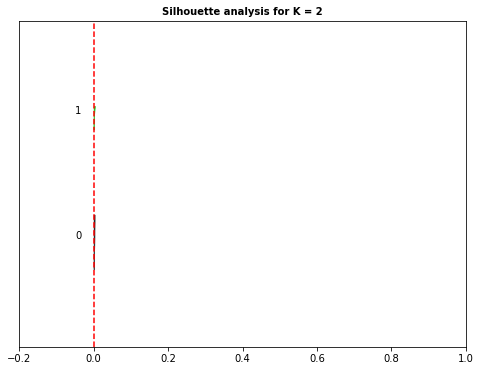

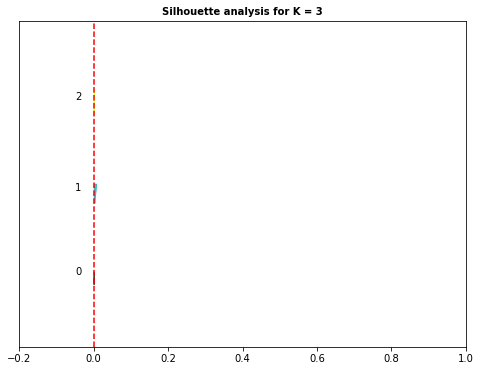

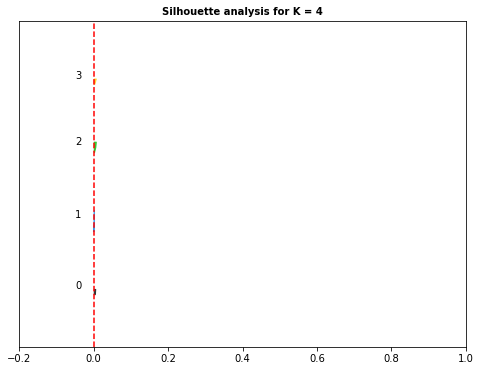

In [90]:
silhouette(kmeans_results, final_df, plot=True)

In [91]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

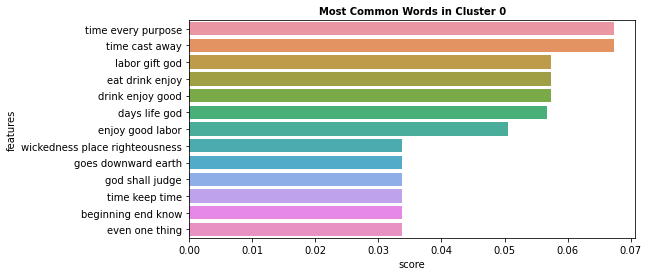

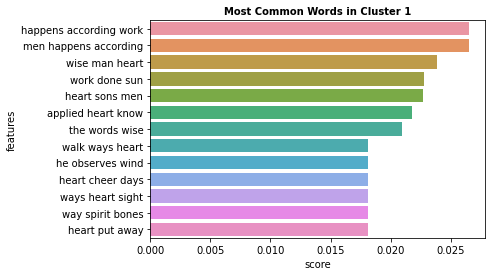

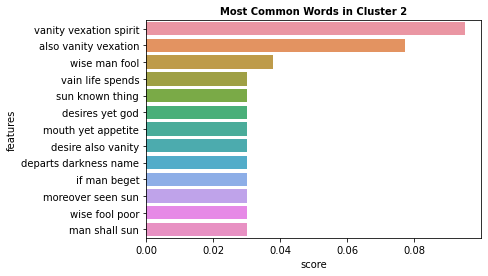

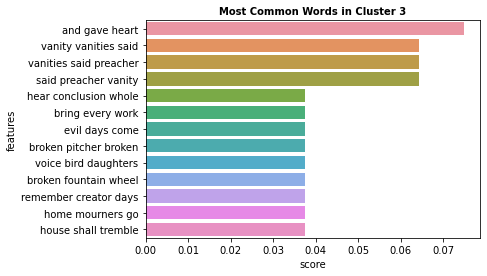

In [92]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [93]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

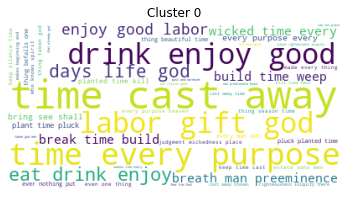

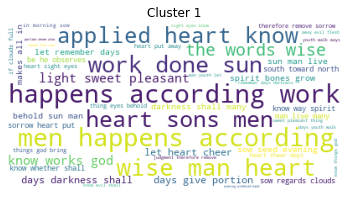

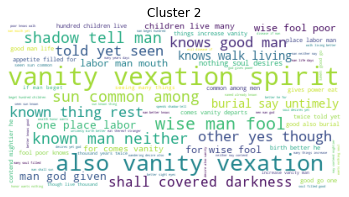

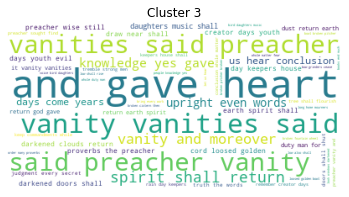

In [94]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [95]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Eclesiastes_1,"'words', 'preacher', ',', 'son', 'david', ',',...",3
101,Eclesiastes_2,"'said', 'heart', ',', 'go', ',', 'prove', 'mir...",2
102,Eclesiastes_3,"'every', 'thing', 'season', ',', 'time', 'ever...",0
103,Eclesiastes_4,"'returned', ',', 'considered', 'oppressions', ...",2
104,Eclesiastes_5,"'keep', 'foot', 'go', 'house', 'god', ',', 're...",0


In [96]:
print(df)

              Autor                                              Livro  label
100   Eclesiastes_1  'words', 'preacher', ',', 'son', 'david', ',',...      3
101   Eclesiastes_2  'said', 'heart', ',', 'go', ',', 'prove', 'mir...      2
102   Eclesiastes_3  'every', 'thing', 'season', ',', 'time', 'ever...      0
103   Eclesiastes_4  'returned', ',', 'considered', 'oppressions', ...      2
104   Eclesiastes_5  'keep', 'foot', 'go', 'house', 'god', ',', 're...      0
105   Eclesiastes_6  'evil', 'seen', 'sun', ',', 'common', 'among',...      2
106   Eclesiastes_7  'good', 'name', 'better', 'precious', 'ointmen...      1
107   Eclesiastes_8  'wise', 'man', '?', 'knows', 'interpretation',...      1
108   Eclesiastes_9  'considered', 'heart', 'even', 'declare', ',',...      1
109  Eclesiastes_10  'dead', 'flies', 'cause', 'ointment', 'apothec...      1
110  Eclesiastes_11  'cast', 'bread', 'waters', ':', 'shall', 'find...      1
111  Eclesiastes_12  'remember', 'creator', 'days', 'youth', ','